**21BAI1892**

**Madhuri Santhosh Srinivasan**

Link to GitHub Repository: https://github.com/madhurisanthoshs/Machine-Vision-Lab/blob/8aca16df896196c1a22efc0319fd76a5f81b313e/MV_AS_2.ipynb

## MV AS - 2

## Task 1

In [40]:
# importing libraries
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt

Importing the distorted image

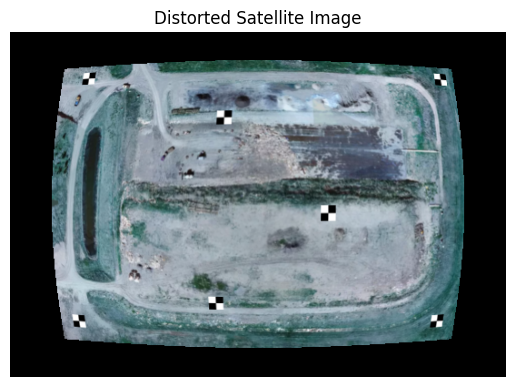

In [283]:
# Load and convert image to RGB
dist = cv2.cvtColor(cv2.imread(r"C:\Users\santh\Downloads\7th Sem\Machine Vision\Lab\mv_images\def.png"), cv2.COLOR_BGR2RGB)
orig = cv2.cvtColor(cv2.imread(r"C:\Users\santh\Downloads\7th Sem\Machine Vision\Lab\mv_images\sat_dist.png"), cv2.COLOR_BGR2RGB)

# Display image
plt.imshow(dist)
plt.title('Distorted Satellite Image')
plt.axis('off')
plt.show()

Identifying coordinates of the GCPs on the distorted image

In [284]:
pt = []
def select_points(evt, x, y, flags, param):
    if evt == cv2.EVENT_LBUTTONDOWN:
        pt.append((x, y))
cv2.namedWindow("satellite img")
cv2.setMouseCallback("satellite img", select_points)
while True:
    cv2.imshow("satellite img", dist)
    if cv2.waitKey(1) & 0xFF == 27:
        break
cv2.destroyAllWindows()
source = np.array(pt,dtype=np.float32)
print("source points: ", source)

source points:  [[ 61.  41.]
 [486.  42.]
 [484. 337.]
 [ 62. 339.]]


Defining the corresponding coordinates for GCP in the rectified image

In [285]:
r_pt = []
def select_points(evt, x, y, flags, param):
    if evt == cv2.EVENT_LBUTTONDOWN:
        r_pt.append((x, y))
cv2.namedWindow("satellite img")
cv2.setMouseCallback("satellite img", select_points)
while True:
    cv2.imshow("satellite img", orig)
    if cv2.waitKey(1) & 0xFF == 27:
        break
cv2.destroyAllWindows()
dest = np.array(r_pt,dtype=np.float32)
print("destination points: ", dest)

destination points:  [[  2.   1.]
 [544.   3.]
 [542. 375.]
 [  6. 377.]]


Transformation Matrix to map distorted image to the correct coordinates

In [286]:
M = cv2.getPerspectiveTransform(source, dest)
h, w  = dist.shape[:2]

Bilinear Interpolation to resample pixel values in the rectified image

In [287]:
rect = cv2.warpPerspective(dist, M, (w,h), flags=cv2.INTER_LINEAR)

Comparing the rectified image with the original image

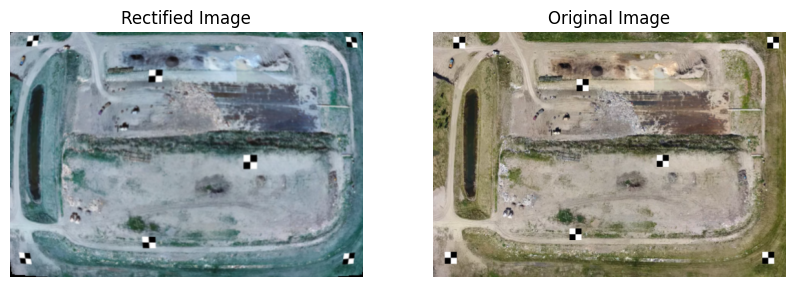

In [290]:
plt.figure(figsize=[10,15])
plt.subplot(1,2,1)
plt.axis('off')
plt.title('Rectified Image')
plt.imshow(rect)
plt.subplot(1,2,2)
plt.title('Original Image')
plt.axis('off')
plt.imshow(orig)

The distorted satellite image exhibited distortion. To correct this, Ground Control Points (GCPs) were manually selected on key features of the distorted image. Corresponding points in the corrected image space were predefined. Using these points, a transformation matrix was calculated. The image was then rectified using bilinear interpolation. After transformation, the rectified image showed proper alignment, with roads and buildings appearing straight and well-proportioned. The side-by-side comparison demonstrates the effectiveness of the rectification.

## Task 2: Medical Image Rectification

Importing the distorted image

Importing the distorted image

In [206]:
mri = cv2.cvtColor(cv2.imread(r"C:\Users\santh\Downloads\7th Sem\Machine Vision\Lab\mv_images\mri.png"), cv2.COLOR_BGR2RGB)
mri_dist = cv2.cvtColor(cv2.imread(r"C:\Users\santh\Downloads\7th Sem\Machine Vision\Lab\mv_images\mri_dist.jpg"), cv2.COLOR_BGR2RGB)


(-0.5, 523.5, 603.5, -0.5)

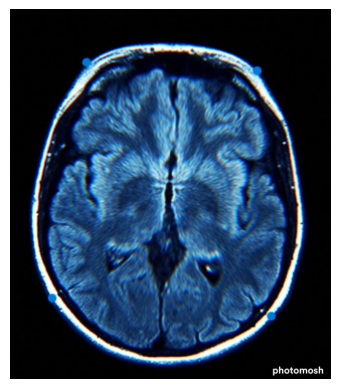

In [314]:
plt.imshow(mri_dist)
plt.axis('off')

Identifying and marking key points on the distorted MRI image.

In [207]:
pt = []
def select_points(evt, x, y, flags, param):
    if evt == cv2.EVENT_LBUTTONDOWN:
        pt.append((x, y))
cv2.namedWindow("MRI")
cv2.setMouseCallback("MRI", select_points)
while True:
    cv2.imshow("MRI", mri_dist)
    if cv2.waitKey(1) & 0xFF == 27:
        break
cv2.destroyAllWindows()
source = np.array(pt,dtype=np.float32)
print("Source: ", source)

Source:  [[124.  87.]
 [403. 100.]
 [427. 502.]
 [ 68. 472.]]


Obtaining the corresponding coordinates from the reference anatomical model. 

In [208]:
pt = []
def select_points(evt, x, y, flags, param):
    if evt == cv2.EVENT_LBUTTONDOWN:
        pt.append((x, y))
cv2.namedWindow("MRI")
cv2.setMouseCallback("MRI", select_points)
while True:
    cv2.imshow("MRI", mri)
    if cv2.waitKey(1) & 0xFF == 27:
        break
cv2.destroyAllWindows()
dest = np.array(pt,dtype=np.float32)
print("Source: ", dest)

Source:  [[130.  96.]
 [399. 108.]
 [422. 494.]
 [ 76. 466.]]


Applying a transformation matrix to align the MRI image with the reference model.

In [210]:
M = cv2.getPerspectiveTransform(source, dest)
h, w  = mri_dist.shape[:2]

Using bilinear interpolation to resample the pixel values in the rectified image.

In [211]:
mri_rect = cv2.warpPerspective(mri_dist, M, (w,h), flags=cv2.INTER_LINEAR)

Comparing the rectified MRI image with the reference model to assess accuracy. 

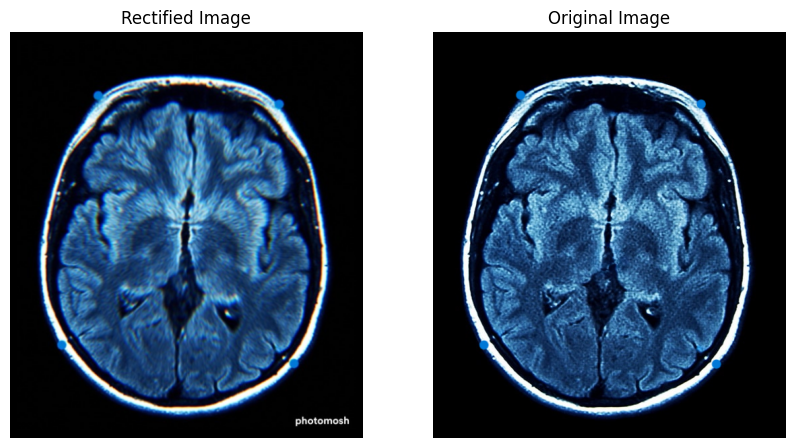

In [281]:
plt.figure(figsize=[10,15])
plt.subplot(1,2,1)
plt.axis('off')
plt.title('Rectified Image')
plt.imshow(mri_rect)
plt.subplot(1,2,2)
plt.title('Original Image')
plt.axis('off')
plt.imshow(mri)

The distorted MRI scan showed anatomical features that did not align with the reference model. To rectify this, key points were manually selected on both the distorted MRI and the reference image. A perspective transformation matrix was computed based on the relationships between these points. The transformation was then applied using bilinear interpolation, which resampled the pixel values during the rectification process. The corrected MRI image showed improved alignment with the reference anatomical model, with structures appearing more accurately positioned. The final rectified image had much better geometric accuracy.

## Task 3: Drone Image Rectification

Importing the distorted drone image.

In [274]:
drone_img = cv2.cvtColor(cv2.imread(r"C:\Users\santh\Downloads\7th Sem\Machine Vision\Lab\mv_images\drone.png"), cv2.COLOR_BGR2RGB)
drone_dist = cv2.cvtColor(cv2.imread(r"C:\Users\santh\Downloads\7th Sem\Machine Vision\Lab\mv_images\drone_dist.png"), cv2.COLOR_BGR2RGB)

(-0.5, 599.5, 337.5, -0.5)

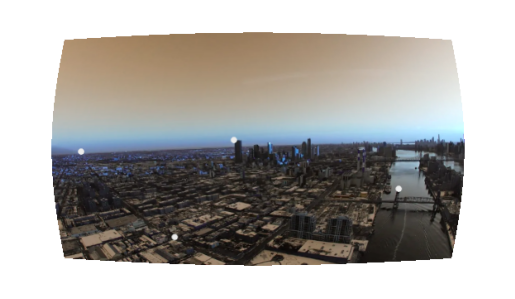

In [311]:
plt.imshow(drone_dist)
plt.axis('off')

Identifying and marking control points on the distorted image. 

In [275]:
r_pt = []
def select_points(evt, x, y, flags, param):
    if evt == cv2.EVENT_LBUTTONDOWN:
        r_pt.append((x, y))
cv2.namedWindow("drone img")
cv2.setMouseCallback("drone img", select_points)
while True:
    cv2.imshow("drone img", drone_dist)
    if cv2.waitKey(1) & 0xFF == 27:
        break
cv2.destroyAllWindows()
source = np.array(r_pt,dtype=np.float32)
print("destination points: ", source)

destination points:  [[ 69.  37.]
 [533.  38.]
 [533. 301.]
 [ 67. 299.]]


Defining the corresponding coordinates for the control points in the rectified image. 

In [276]:
r_pt = []
def select_points(evt, x, y, flags, param):
    if evt == cv2.EVENT_LBUTTONDOWN:
        r_pt.append((x, y))
cv2.namedWindow("drone img")
cv2.setMouseCallback("drone img", select_points)
while True:
    cv2.imshow("drone img", drone_img)
    if cv2.waitKey(1) & 0xFF == 27:
        break
cv2.destroyAllWindows()
dest = np.array(r_pt,dtype=np.float32)
print("source points: ", dest)

source points:  [[  3.   2.]
 [599.   0.]
 [597. 335.]
 [  6. 335.]]


Applying a transformation matrix to map the distorted image to the corrected coordinates.

In [277]:
M = cv2.getPerspectiveTransform(source, dest)
h, w  = drone_dist.shape[:2]

Using bilinear interpolation to resample the pixel values in the rectified image. 

In [278]:
rect_drone = cv2.warpPerspective(drone_dist, M, (w,h), flags=cv2.INTER_LINEAR)

Generating an orthophoto of the field and comparing it with the original image. 

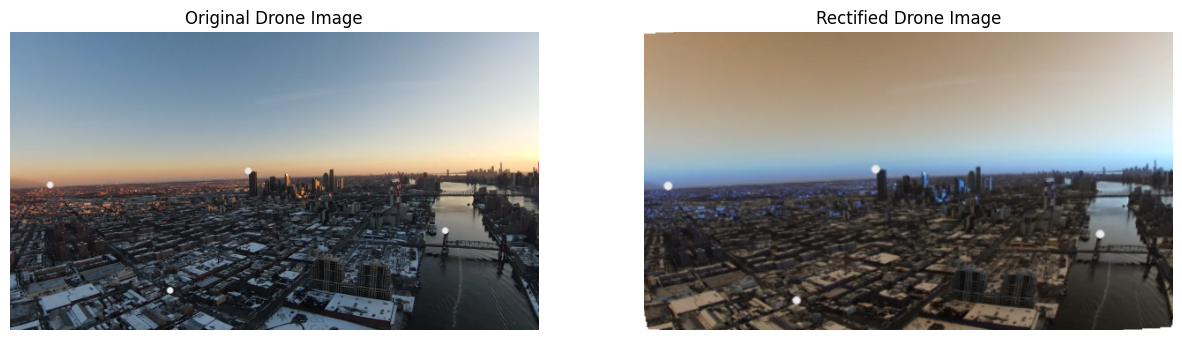

In [280]:
plt.figure(figsize=[15,20])
plt.subplot(1, 2, 1), plt.imshow(drone_img), plt.axis('off'), plt.title('Original Drone Image')
plt.subplot(1, 2, 2), plt.imshow(rect_drone), plt.axis('off'), plt.title('Rectified Drone Image')
plt.show()

The distorted drone image displayed radial distortion. Control Points (CPs) were manually selected at key locations within the distorted image, such as field corners. These points were mapped to corresponding coordinates in the rectified image space. Using a perspective transformation matrix, the image was corrected, and bilinear interpolation was applied to maintain smooth pixel transitions. The rectified drone image showed better boundaries. The side-by-side comparison shows the difference, making the rectified image more suitable for analysis.

## Task 4: Historical Photo Restoration

Import the scanned old photograph into the image processing software. 

In [292]:
hist_img = cv2.cvtColor(cv2.imread(r"C:\Users\santh\Downloads\7th Sem\Machine Vision\Lab\mv_images\hist_img.png"), cv2.COLOR_BGR2RGB)
hist_dist = cv2.cvtColor(cv2.imread(r"C:\Users\santh\Downloads\7th Sem\Machine Vision\Lab\mv_images\hist_dist.png"), cv2.COLOR_BGR2RGB)

(-0.5, 599.5, 599.5, -0.5)

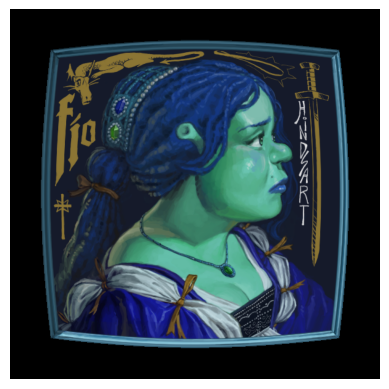

In [312]:
plt.imshow(hist_dist)
plt.axis('off')

Identify and mark key points on the distorted photograph

In [293]:
r_pt = []
def select_points(evt, x, y, flags, param):
    if evt == cv2.EVENT_LBUTTONDOWN:
        r_pt.append((x, y))
cv2.namedWindow("hist img")
cv2.setMouseCallback("hist img", select_points)
while True:
    cv2.imshow("hist img", hist_dist)
    if cv2.waitKey(1) & 0xFF == 27:
        break
cv2.destroyAllWindows()
source = np.array(r_pt,dtype=np.float32)
print("source points: ", source)

source points:  [[ 80.  78.]
 [520.  80.]
 [520. 520.]
 [ 80. 521.]]


Obtain the corresponding coordinates from a reference image or known dimensions. 

In [294]:
r_pt = []
def select_points(evt, x, y, flags, param):
    if evt == cv2.EVENT_LBUTTONDOWN:
        r_pt.append((x, y))
cv2.namedWindow("hist img")
cv2.setMouseCallback("hist img", select_points)
while True:
    cv2.imshow("hist img", hist_img)
    if cv2.waitKey(1) & 0xFF == 27:
        break
cv2.destroyAllWindows()
dest = np.array(r_pt,dtype=np.float32)
print("destination points: ", dest)

destination points:  [[ 22.  22.]
 [579.  22.]
 [578. 578.]
 [ 22. 578.]]


Apply a transformation matrix to align the distorted photograph with the reference coordinates. 

In [295]:
M = cv2.getPerspectiveTransform(source, dest)
h, w  = hist_dist.shape[:2]

Use bilinear interpolation to resample the pixel values in the rectified image. 

In [296]:
rect_hist = cv2.warpPerspective(hist_dist, M, (w,h), flags=cv2.INTER_LINEAR)

Compare the rectified photograph with the original scanned image and the reference image. 

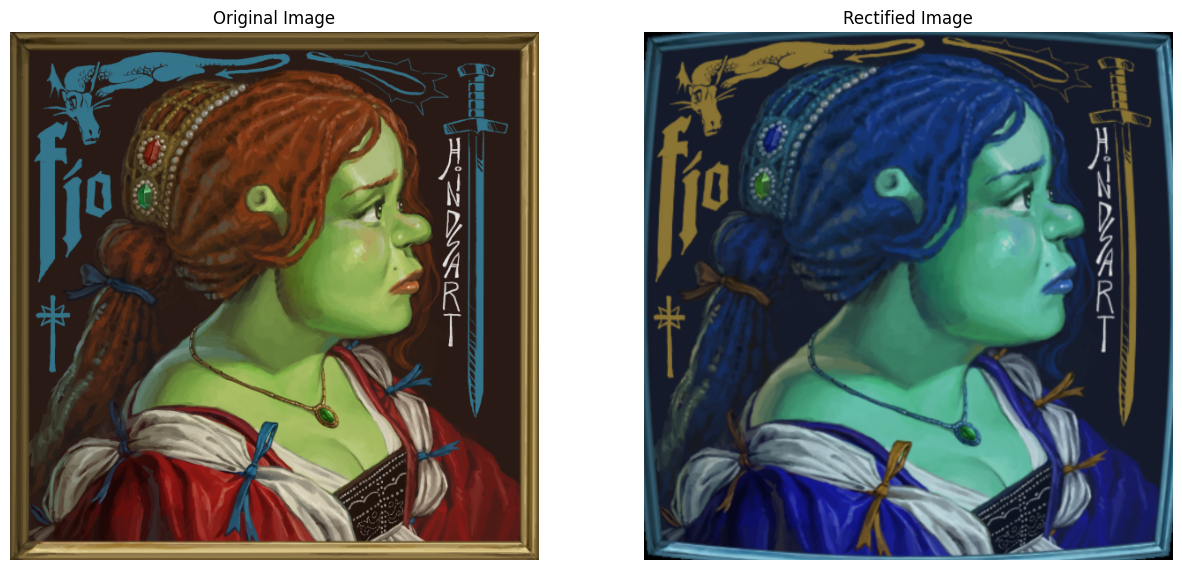

In [297]:
plt.figure(figsize=[15,20])
plt.subplot(1, 2, 1), plt.imshow(hist_img), plt.axis('off'), plt.title('Original Image')
plt.subplot(1, 2, 2), plt.imshow(rect_hist), plt.axis('off'), plt.title('Rectified Image')
plt.show()

The historical photo was affected by barrel distortion, where the image appeared stretched outward from the center. Signifant points of the distorted image were marked, and these points were mapped to corresponding coordinates in the rectified image space. Using a perspective transformation matrix, the image was corrected, and bilinear interpolation was applied to ensure smooth transitions between pixels. After the transformation, the image appeared much more natural, with straight lines that were previously curved. The restored image looked significantly better, closely resembling how the original photo would have appeared without distortion. The comparison with the original distorted image shows the effective reduction in barrel distortion.

## Task 5: Architectural Image Rectification

Importing the distorted image

In [299]:
arch = cv2.cvtColor(cv2.imread(r"C:\Users\santh\Downloads\7th Sem\Machine Vision\Lab\mv_images\arch.jpg"), cv2.COLOR_BGR2RGB)
arch_dist = cv2.cvtColor(cv2.imread(r"C:\Users\santh\Downloads\7th Sem\Machine Vision\Lab\mv_images\arch_dist.jpeg"), cv2.COLOR_BGR2RGB)

(-0.5, 1079.5, 952.5, -0.5)

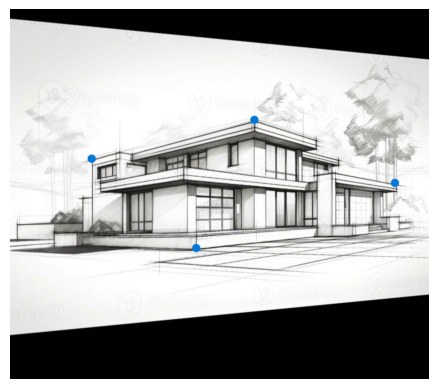

In [313]:
plt.imshow(arch_dist)
plt.axis('off')

Identify and mark key points on the distorted image corresponding to known dimensions of the building. 

In [300]:
r_pt = []
def select_points(evt, x, y, flags, param):
    if evt == cv2.EVENT_LBUTTONDOWN:
        r_pt.append((x, y))
cv2.namedWindow("arch img")
cv2.setMouseCallback("arch img", select_points)
while True:
    cv2.imshow("arch img", arch_dist)
    if cv2.waitKey(1) & 0xFF == 27:
        break
cv2.destroyAllWindows()
source = np.array(r_pt,dtype=np.float32)
print("source points: ", source)

source points:  [[211. 388.]
 [631. 287.]
 [995. 451.]
 [481. 619.]]


Define the corresponding coordinates for these points in the rectified image. 

In [301]:
r_pt = []
def select_points(evt, x, y, flags, param):
    if evt == cv2.EVENT_LBUTTONDOWN:
        r_pt.append((x, y))
cv2.namedWindow("arch img")
cv2.setMouseCallback("arch img", select_points)
while True:
    cv2.imshow("arch img", arch)
    if cv2.waitKey(1) & 0xFF == 27:
        break
cv2.destroyAllWindows()
dest = np.array(r_pt,dtype=np.float32)
print("destination points: ", dest)

destination points:  [[163. 267.]
 [550. 175.]
 [969. 321.]
 [403. 457.]]


Apply a transformation matrix to align the distorted image with the known dimensions. 

In [302]:
M = cv2.getPerspectiveTransform(source, dest)
h, w  = hist_dist.shape[:2]

Use bilinear interpolation to resample the pixel values in the rectified image. 

In [303]:
rect_arch = cv2.warpPerspective(arch, M, (w,h), flags=cv2.INTER_LINEAR)

Compare the rectified image with the original distorted image to evaluate the correction. 

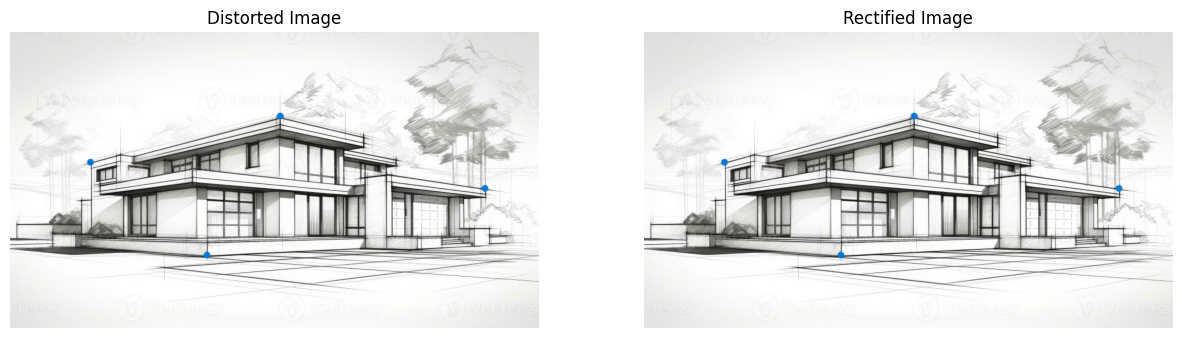

In [307]:
plt.figure(figsize=[15,20])
plt.subplot(1, 2, 1), plt.imshow(arch), plt.axis('off'), plt.title('Distorted Image')
plt.subplot(1, 2, 2), plt.imshow(rect_arch), plt.axis('off'), plt.title('Rectified Image')
plt.show()

The architectural image initially displayed perspective distortion, with the building appearing to lean backward. Key points were manually selected on the distorted image, corresponding to known features of the building. A set of corresponding points was defined for the rectified image, and a perspective transformation matrix was computed. The transformation was applied using bilinear interpolation, which resampled the pixel values smoothly. The rectified image showed the building’s vertical lines properly aligned, correcting the perspective distortion. The comparison between the distorted and rectified images clearly displays the improvement, with the building appearing geometrically accurate and natural in perspective.